In [1]:
import pandas as pd
import numpy as np

## 目录

**一、时序中的基本对象**


**二、时间戳**

* 2.1. Timestamp的构造与属性
* 2.2. Datetime序列的生成
* 2.3. dt对象
* 2.4. 时间戳的切片与索引


**三、时间差**

* 3.1. Timedelta的生成
* 3.2. Timedelta的运算



**四、时间偏置**

* 4.1. Offset对象
* 4.2. 偏置字符串


**五、时序中的滑窗与分组**

* 5.1. 滑动窗口
* 5.2. 重采样

**六、练习**

* Ex1：太阳辐射数据集
* Ex2：水果销量数据集

## 学习内容

### 一、时序中的基本对象

 时间序列是一个非常常见的概念，例如2020年9月7日周一早上8点整需要到教室上课，这个课会在当天早上10点结束，其中包含了哪些时间概念？
 
 * **时间戳（Date times）** ’2020-9-7 08:00:00’和’2020-9-7 10:00:00’这两个时间点分别代表了上课和下课的时刻，**在 pandas 中称为 Timestamp**。一系列的时间戳 则组成了DatetimeIndex，时间戳series序列的类型则为**datetime64[ns]**
 
 * **时间差（Time delta）** 两个 Timestamp 做差就得到了时间差，pandas中利用 **Timedelta** 来表示。一系列的时间差就组成了 TimedeltaIndex ， Series 的类型为**timedelta64[ns] **
 
 * **时间段 （Time spans）** 时间段的概念不是很常用，例8点-10点这个时刻持续上课，这个就属于时间端，pandas中用Period来表示，一系列的时间组成了PeriodIndex，series的类型为Period
 
 * **日期偏置 （Date offsets）** 日期偏置不是一个单独的数据类型，只要掌握基本的函数使用就可以了。
 
 官方介绍参照[官方文档](https://pandas.pydata.org/docs/user_guide/timeseries.html#overview)



In [14]:
# timetamp

pd.Series(pd.date_range('2021-01',freq = 'D',periods=3))

0   2021-01-01
1   2021-01-02
2   2021-01-03
dtype: datetime64[ns]

In [16]:
# data offset

pd.Series([pd.DateOffset(1),pd.DateOffset(2)])

0         <DateOffset>
1    <2 * DateOffsets>
dtype: object


### 二、时间戳

#### 2.1. Timestamp的构造与属性

* 单个时间戳生成利用 **pd.Timestamp** 实现，可以通过.year, .month, .day, .hour, .min, .second 可以获取对应的值  
   
   
* **pd.Timestamp()** 生成时间戳的方式有多种，
    * 可以直接指定要转为timestamp类型的 字符串，
    * 可以通过指定年year 月 month 日 day来得到timestamp
    * 可以将s表示的浮点数 转化为通识时间类型,（计算机的时间 是从1970-01-01 开始的，之后的时间通过当前时间与 1970-01-01 相差的秒数作为时间戳）


* **pd.Timestamp()** 
    参数解释：
    
> * ts_input=<object object at 0x0000021BF7ECBEA0>,datetime-like, str, int, float,转化为时间戳的值
> * freq=None, 时间戳的时间偏移单位
> * tz=None, 指定时区
> * unit=None, 时间戳转化时的最小单位，默认时ms，  'D', 'h', 'm', 's', 'ms', 'us', and 'ns'
> * year=None, 年
> * month=None, 月
> * day=None, 日
> * hour=None, 时
> * minute=None, 分
> * second=None, 秒
> * microsecond=None, 毫秒
> * nanosecond=None, 纳秒

In [17]:
# 时间戳构造

pd.Timestamp('2021/01/08')

Timestamp('2021-01-08 00:00:00')

In [18]:
# 时间戳构造

pd.Timestamp('2020-01-08 21:09:00')

Timestamp('2020-01-08 21:09:00')

In [24]:
# 时间戳构造 

pd.Timestamp(1212222355555554595.09)

Timestamp('2008-05-31 08:25:55.555554560')

In [25]:
# 时间戳构造

pd.Timestamp(2021,1,8)

Timestamp('2021-01-08 00:00:00')

In [37]:
#  unit
pd.Timestamp(15133, unit='d')

Timestamp('2011-06-08 00:00:00')

In [38]:
#  unit
pd.Timestamp(15133, unit='s')

Timestamp('1970-01-01 04:12:13')

In [39]:
# year

ts = pd.Timestamp(15133, unit='d')
ts.year

2011

In [40]:
# day
ts = pd.Timestamp(15133, unit='d')
ts.day

8

#### 2.2. Datetime序列的生成

* Datetime时间戳序列可以由 to_datetime 和 date_range 来生成  
  
* **pd.to_datetime()**  
      
    参数说明
      
> *  **arg** :Union[~DatetimeScalar, List, Tuple, ~ ArrayLike, _ ForwardRef('Series') ],  
> * **errors**:str='raise',遇见无效数据的处理方式，具体参照函数使用说明
> * **dayfirst**:bool=False, 要转化为 时间戳的 values 是否把day放在前面的，例如 10/02/12 认为是2012年02月10日
> * **yearfirst:**bool=False, 要转化为 时间戳的 values 是否把year放在前面的，例如 10/02/12 认为是2010年02月12日
> * utc:Union[bool, NoneType]=None,
> * **format:**Union[str, NoneType]=None, 要转化为 时间戳的 values的时间形式，举例 "%d/%m/%Y", 意思是 "%f" will parse，对应的表达方式可[参照](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
> * **exact:** 精度，bool：True by default，表现为：如果为True，则需要精确的格式匹配。如果为False，则允许格式匹配目标字符串中的任何位置。
> * **unit:**Union[str, NoneType]=None, 时间戳的时间单位
> * **infer_datetime_format:** bool=False,
> * origin ='unix', 定义参考时间，默认为unix，也就是之前提到的1970-01-01
> * cache :bool=True 提高缓存速度的一个参数



In [41]:
#
pd.to_datetime(['2020-01-01','2020-01-03','2020-01-04'])

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-04'], dtype='datetime64[ns]', freq=None)

In [42]:
# dayfirst

pd.to_datetime(['20-01-01','20-01-03','20-01-04'],dayfirst= True)

DatetimeIndex(['2001-01-20', '2003-01-20', '2004-01-20'], dtype='datetime64[ns]', freq=None)

In [43]:
# yearfirst

pd.to_datetime(['20-01-01','20-01-03','20-01-04'],yearfirst= True)

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-04'], dtype='datetime64[ns]', freq=None)

In [52]:
# format

pd.to_datetime(['2020?01?01','2020?01?03'],format= '%Y?%m?%d')

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq=None)

In [54]:
# unit  

pd.to_datetime([152888845,152888846,152888847],unit='s')

DatetimeIndex(['1974-11-05 13:07:25', '1974-11-05 13:07:26',
               '1974-11-05 13:07:27'],
              dtype='datetime64[ns]', freq=None)

In [58]:
# 多表时间属性拼接转为时间序列

df_time = pd.DataFrame({'year':[2020,2020],
                       'month':[1,2],
                       'day':[1,2]})

pd.to_datetime(df_time)

0   2020-01-01
1   2020-02-02
dtype: datetime64[ns]

* **pd.date_range()** date_range生成一系列连续时间间隔的函数
     参数说明,
     
> * **start**=None, str or datetime-like, optional，生成连续时间间隔的左边界
> * **end**=None,str or datetime-like, optional，生成连续时间间隔的右边界
> * **periods**=None,int, optional，日期时间的个数
> * **freq**=None, str or DateOffset, default 'D'
> * tz=None,时区
> * normalize=False,是否标准化
> * name=None,对timeindex命名
> * closed=None，区间的左开右闭形式


In [65]:
#
pd.date_range(start='2021-1-1',
              end = '2021-1-5',
              freq = 'd')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', freq='D')

In [68]:
# 另外还有一种 改变序列采样频率的方法 asfreq

s = pd.Series(np.random.randn(5),index=pd.to_datetime(['2020-1-%d'%i for i in range(1,10,2)]))
s

2020-01-01    0.767892
2020-01-03   -0.445279
2020-01-05    0.084127
2020-01-07   -0.346331
2020-01-09    0.669826
dtype: float64

In [69]:
s.asfreq('D')

2020-01-01    0.767892
2020-01-02         NaN
2020-01-03   -0.445279
2020-01-04         NaN
2020-01-05    0.084127
2020-01-06         NaN
2020-01-07   -0.346331
2020-01-08         NaN
2020-01-09    0.669826
Freq: D, dtype: float64

In [70]:
s.asfreq('12H')

2020-01-01 00:00:00    0.767892
2020-01-01 12:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 12:00:00         NaN
2020-01-03 00:00:00   -0.445279
2020-01-03 12:00:00         NaN
2020-01-04 00:00:00         NaN
2020-01-04 12:00:00         NaN
2020-01-05 00:00:00    0.084127
2020-01-05 12:00:00         NaN
2020-01-06 00:00:00         NaN
2020-01-06 12:00:00         NaN
2020-01-07 00:00:00   -0.346331
2020-01-07 12:00:00         NaN
2020-01-08 00:00:00         NaN
2020-01-08 12:00:00         NaN
2020-01-09 00:00:00    0.669826
Freq: 12H, dtype: float64

#### 2.3. dt对象

* 如同之前提到的**category类型上的cat对象**和**string上的str对象**，**timestamp时间序列类型定义了dt对象**

* 同样的dt对象具备着 一系列的函数的属性可以直接调用

* **第一类操作的常用属性包括：** date, time, year, month, day, hour, minute, second, microsecond, nanosecond, **dayofweek**, dayofyear, weekofyear, daysinmonth, quarter ，其中 daysinmonth, quarter 分别表示该月有多少天 和季度。


In [71]:
time = pd.Series(pd.date_range('2021-01-10',periods = 5 ,freq='D'))
time

0   2021-01-10
1   2021-01-11
2   2021-01-12
3   2021-01-13
4   2021-01-14
dtype: datetime64[ns]

In [73]:
# date

time.dt.date

0    2021-01-10
1    2021-01-11
2    2021-01-12
3    2021-01-13
4    2021-01-14
dtype: object

In [74]:
# day

time.dt.day

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [75]:
# dayofweek 这周的第几天

time.dt.dayofweek

0    6
1    0
2    1
3    2
4    3
dtype: int64

In [95]:
# dayinmonth 

s = pd.Series(pd.date_range('2021-01-10',periods = 5 ,freq='d'))

s

0   2021-01-10
1   2021-01-11
2   2021-01-12
3   2021-01-13
4   2021-01-14
dtype: datetime64[ns]

In [96]:
s.dt.daysinmonth

0    31
1    31
2    31
3    31
4    31
dtype: int64

In [101]:
# month_name
s = pd.Series(pd.date_range(start = '2021-01-10',periods = 5 ,freq='m'))

s.dt.month_name()

0     January
1    February
2       March
3       April
4         May
dtype: object

In [103]:
# weekname

s.dt.day_name()

0       Sunday
1       Sunday
2    Wednesday
3       Friday
4       Monday
dtype: object

* **第二类判断操作**主要用于测试是否为月/季/年的第一天is_year_start或者最后一天is_year_end

    对应的还有 is_quarter/month_start/end

In [104]:
# is_year_start

s = pd.Series(pd.date_range(start = '2021-01-01',periods = 5 ,freq='d'))
s.dt.is_year_start

0     True
1    False
2    False
3    False
4    False
dtype: bool

* **第三类的取整操作**包含 round, ceil, floor ，它们的公共参数为 freq ，常用的包括 H, min, S （小时、分钟、秒），所有可选的 freq 可参考 [此处](https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases) 。

In [106]:
# 
s = pd.Series(pd.date_range(start = '2021-01-10 20:35:00' , periods = 3,freq = '45min'))
s

0   2021-01-10 20:35:00
1   2021-01-10 21:20:00
2   2021-01-10 22:05:00
dtype: datetime64[ns]

In [108]:
# round

s.dt.round(freq = 'H')

0   2021-01-10 21:00:00
1   2021-01-10 21:00:00
2   2021-01-10 22:00:00
dtype: datetime64[ns]

In [109]:
# ceil

s.dt.ceil(freq = 'H')

0   2021-01-10 21:00:00
1   2021-01-10 22:00:00
2   2021-01-10 23:00:00
dtype: datetime64[ns]

In [110]:
# floor

s.dt.floor(freq = 'H')

0   2021-01-10 20:00:00
1   2021-01-10 21:00:00
2   2021-01-10 22:00:00
dtype: datetime64[ns]

#### 2.4. 时间戳的切片与索引

* 时间戳的切片和索引 本质和 其他序列 的索引没有区别，一个是通过 **dt对象和布尔对象联合使用**，一个是利用简单的 **切片索引**

下面可以通过简单的示例来完成时间戳的切片：

In [125]:
# 数据集

df = pd.read_csv('../data/learn_pandas.csv')
df['Test_Date'] = pd.to_datetime(df['Test_Date'])
df.set_index('Test_Date',inplace = True)
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Time_Record
Test_Date,,,,,,,,,
2019-10-05,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,0:04:34
2019-09-04,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,0:04:20
2019-09-12,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,0:05:22
2020-01-03,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,0:04:08
2019-11-06,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,0:05:22


In [127]:
df.loc['2019-10-05':'2019-10-10',:]

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Time_Record
Test_Date,,,,,,,,,
2019-10-05,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,0:04:34
2019-10-05,Peking University,Junior,Juan Xu,Female,164.8,NaN,N,3,0:04:05
2019-10-05,Peking University,Junior,Changjuan You,Female,161.4,47.0,N,1,0:04:08
2019-10-08,Peking University,Freshman,Gaoli Zhao,Male,175.4,78.0,N,2,0:03:32
2019-10-07,Tsinghua University,Sophomore,Li Wang,Male,175.0,79.0,N,1,0:04:12
2019-10-09,Shanghai Jiao Tong University,Senior,Chunpeng Lv,Female,164.1,56.0,N,1,0:04:28
2019-10-07,Tsinghua University,Freshman,Gaojuan Qin,Female,NaN,41.0,N,1,0:05:04
2019-10-06,Shanghai Jiao Tong University,Freshman,Changmei Lv,Male,172.2,75.0,N,1,0:04:15
2019-10-09,Fudan University,Freshman,Yanjuan Zhao,Female,NaN,53.0,N,2,0:04:21


In [142]:
# 为了简单起见，选取部分数据作为示例
s = df['Name']
idx = pd.Series(s.index).dt

s.head()

Test_Date
2019-10-05      Gaopeng Yang
2019-09-04    Changqiang You
2019-09-12           Mei Sun
2020-01-03      Xiaojuan Sun
2019-11-06       Gaojuan You
Name: Name, dtype: object

* Example1：每月的第一天或者最后一天

In [149]:
s[(idx.is_month_start|idx.is_month_end).values].head()

Test_Date
2019-10-31        Xiaoli Qian
2020-01-01    Changqiang Yang
2019-09-30          Qiang Chu
2019-10-01     Xiaoquan Zhang
2019-11-01    Chengpeng Zheng
Name: Name, dtype: object

* Example2：工作日

In [152]:
s[(idx.dayofweek.isin([0,1,2,3,4])).values].head()

Test_Date
2019-09-04    Changqiang You
2019-09-12           Mei Sun
2020-01-03      Xiaojuan Sun
2019-11-06       Gaojuan You
2019-10-31       Xiaoli Qian
Name: Name, dtype: object

* Example4：取出九月

In [156]:
s['2019-9'].head()

Test_Date
2019-09-04    Changqiang You
2019-09-12           Mei Sun
2019-09-03     Gaoqiang Qian
2019-09-29     Xiaopeng Zhou
2019-09-16       Xiaoquan Lv
Name: Name, dtype: object

* Example5：切片索引

In [158]:
s['2019-09-28':'2019-09-30']

Test_Date
2019-09-29    Xiaopeng Zhou
2019-09-30        Qiang Chu
2019-09-28      Gaopeng Qin
2019-09-28        Juan Zhao
2019-09-28         Mei Feng
2019-09-28            Li Lv
2019-09-30       Juan Zhang
Name: Name, dtype: object

### 三、时间差 

####  3.1. Timedelta的生成

* 时间差可以理解为两个时间戳的差，同样的也可以通过 **pd.Timedelta** 来构造  


* 生成时间差序列还有**pd.to_timedelta**，使用方法和生成时间差序列的是一样的
  

* 生成一系列的时间差序列有 **pd.timedelta_range**  


* 时间差序列 同样也是使用dt对象，常用的属性有  **days, seconds, mircroseconds, nanoseconds** 需要注意的是，这里的 seconds 不是指单纯的秒，而是对天数取余后剩余的秒数，如果不想对天数取余而直接对应秒数，可以使用 total_seconds  




In [159]:
# 两个时间戳的差

pd.Timestamp('2020-01-10 18:13:00') - pd.Timestamp('2020-01-10 18:11:04')

Timedelta('0 days 00:01:56')

In [160]:
# pd.Timedelta

pd.Timedelta(days=1, minutes=25)

Timedelta('1 days 00:25:00')

In [161]:
# pd.Timedelta
pd.Timedelta('1 minutes 25 seconds')

Timedelta('0 days 00:01:25')

In [163]:
# pd.to_timedelta

s = pd.to_timedelta(df['Time_Record'])
s.head()

Test_Date
2019-10-05   0 days 00:04:34
2019-09-04   0 days 00:04:20
2019-09-12   0 days 00:05:22
2020-01-03   0 days 00:04:08
2019-11-06   0 days 00:05:22
Name: Time_Record, dtype: timedelta64[ns]

In [165]:
# timedelta_range 使用方法是与 date_range 一样的

s  = pd.timedelta_range('0s','1000s',freq = '60s')
s

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00'],
               dtype='timedelta64[ns]', freq='60S')

####  3.2. Timedelta的运算

* 时间差支持的常用运算有三类：与标量的乘法运算、与时间戳的加减法运算、与时间差的加减法与除法运算：


In [167]:
## 时间戳的计算

td1 = pd.Timedelta(days =1)

ts = pd.Timestamp('20200101')

td1+ts

Timestamp('2020-01-02 00:00:00')

* 同样的 时间差的序列也可以直接做计算


In [169]:
# 

td1 = pd.timedelta_range(start='1 days', periods = 5)

td1

TimedeltaIndex(['1 days', '2 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq='D')

In [170]:
td1*5

TimedeltaIndex(['5 days', '10 days', '15 days', '20 days', '25 days'], dtype='timedelta64[ns]', freq='5D')

In [171]:
# 

ts = pd.date_range('20200101','20200105')
ts

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')

In [173]:
ts + td1*5

DatetimeIndex(['2020-01-06', '2020-01-12', '2020-01-18', '2020-01-24',
               '2020-01-30'],
              dtype='datetime64[ns]', freq=None)


### 四、时间偏置

#### 4.1. Offset对象

* 日期偏置是一种特殊时间差吗，首先通过 定义 offset对象，再通过加减 offset 得到我们需要的日期

* EX1 2020年9月第一个周一的日期

In [174]:
pd.Timestamp('20200831') + pd.offsets.WeekOfMonth(week =0 ,weekday = 0)

Timestamp('2020-09-07 00:00:00')

* EX2 2020年9月7日后的第30个工作日是哪一天

In [175]:
 pd.Timestamp('20200907') + pd.offsets.BDay(30)

Timestamp('2020-10-19 00:00:00')

* 常用的日期偏置可以 查阅这个[文档](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
    
    *  pd.offsets.BDay() 偏移多少个工作日
    *  pd.offsets.CDay() 自定义工作日，设置偏移量
    *  pd.offsets.WeekOfMonth() 每个月的第几周的第几天

#### 4.2. 偏置字符串

* 第一节提到生成日期时间戳的函数 date_range 的freq取值 其实和offset的日期偏一一对应，可以参照[官方文档](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)

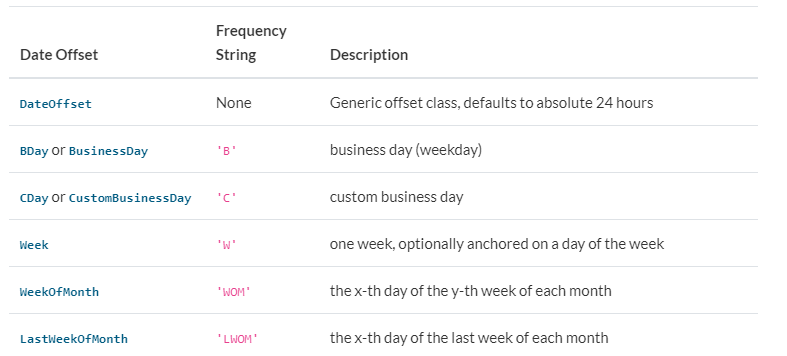

下面是一些常见的例子
* Example1：按照每个月初偏移

In [177]:
pd.date_range('20210110','20210331',freq='MS')

DatetimeIndex(['2021-02-01', '2021-03-01'], dtype='datetime64[ns]', freq='MS')

In [180]:
pd.date_range('20210110','20210331',
              freq=  pd.offsets.MonthBegin())

DatetimeIndex(['2021-02-01', '2021-03-01'], dtype='datetime64[ns]', freq='MS')

* Example2：按照工作日偏移

In [179]:
pd.date_range('20210110','20210331',freq='B')

DatetimeIndex(['2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11',
               '2021-02-12', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
      

In [182]:
pd.date_range('20210110','20210331',freq=pd.offsets.BusinessDay())

DatetimeIndex(['2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11',
               '2021-02-12', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
      

* Example3：按周一偏移

In [186]:
pd.date_range('20210110','20210331',freq='W-MON')

DatetimeIndex(['2021-01-11', '2021-01-18', '2021-01-25', '2021-02-01',
               '2021-02-08', '2021-02-15', '2021-02-22', '2021-03-01',
               '2021-03-08', '2021-03-15', '2021-03-22', '2021-03-29'],
              dtype='datetime64[ns]', freq='W-MON')

In [188]:
pd.date_range('20210110','20210331',freq=pd.offsets.CDay(weekmask = 'Mon'))

DatetimeIndex(['2021-01-11', '2021-01-18', '2021-01-25', '2021-02-01',
               '2021-02-08', '2021-02-15', '2021-02-22', '2021-03-01',
               '2021-03-08', '2021-03-15', '2021-03-22', '2021-03-29'],
              dtype='datetime64[ns]', freq='C')

### 五、时序中的滑窗与分组

#### 5.1. 滑动窗口

* 时序的滑动窗口 rolling 函数


In [ ]:
df.Date.rolling()

#### 5.2. 重采样

这一部分学习暂时空着

### 六、练习

#### Ex1：太阳辐射数据集

In [192]:
# 数据集

df = pd.read_csv('../data/solar.csv',
                 usecols = ['Data','Time','Radiation','Temperature'])

df.head()

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48


In [210]:
df.tail()

,Data,Time,Radiation,Temperature
Datetime,,,,
2016-12-31 23:35:02,12/31/2016 12:00:00 AM,23:35:02,1.22,41
2016-12-31 23:40:01,12/31/2016 12:00:00 AM,23:40:01,1.21,41
2016-12-31 23:45:04,12/31/2016 12:00:00 AM,23:45:04,1.21,42
2016-12-31 23:50:03,12/31/2016 12:00:00 AM,23:50:03,1.19,41
2016-12-31 23:55:01,12/31/2016 12:00:00 AM,23:55:01,1.21,41


* 1、将Datetime, Time 合并为一个时间列 Datetime ，同时把它作为索引后排序。

In [203]:
#
df['Datetime'] = pd.to_datetime(df['Data']+' '+df['Time'])
df.set_index('Datetime',inplace = True)
df = df.sort_index()

df.head()

,Data,Time,Radiation,Temperature
Datetime,,,,
2016-09-01 00:00:08,9/1/2016 12:00:00 AM,00:00:08,2.58,51
2016-09-01 00:05:10,9/1/2016 12:00:00 AM,00:05:10,2.83,51
2016-09-01 00:20:06,9/1/2016 12:00:00 AM,00:20:06,2.16,51
2016-09-01 00:25:05,9/1/2016 12:00:00 AM,00:25:05,2.21,51
2016-09-01 00:30:09,9/1/2016 12:00:00 AM,00:30:09,2.25,51


* 2、每条记录时间的间隔显然并不一致，请解决如下问题：

    * 找出间隔时间的前三个最大值所对应的三组时间戳。

    * 是否存在一个大致的范围，使得绝大多数的间隔时间都落在这个区间中？如果存在，请对此范围内的样本间隔秒数画出柱状图，设置 bins=50 。

In [245]:
# 找出间隔时间的前三个最大值所对应的三组时间戳

df = df.reset_index()
df['Timedetla'] = df['Datetime'] - pd.to_datetime(df['Data'])

#
time_3max = pd.Series(df['Timedetla'].sort_values().unique()).iloc[-3:]
time_3max

#
df[df['Timedetla'].isin(time_3max)]

,Datetime,Data,Time,Radiation,Temperature,Timedetla
26364,2016-12-09 23:55:49,12/9/2016 12:00:00 AM,23:55:49,1.20,49,0 days 23:55:49
29810,2016-12-21 23:55:53,12/21/2016 12:00:00 AM,23:55:53,1.21,45,0 days 23:55:53
30097,2016-12-22 23:55:49,12/22/2016 12:00:00 AM,23:55:49,1.22,49,0 days 23:55:49
30385,2016-12-23 23:55:49,12/23/2016 12:00:00 AM,23:55:49,1.23,47,0 days 23:55:49
30673,2016-12-24 23:56:25,12/24/2016 12:00:00 AM,23:56:25,1.23,46,0 days 23:56:25
30961,2016-12-25 23:55:49,12/25/2016 12:00:00 AM,23:55:49,1.24,45,0 days 23:55:49
31825,2016-12-28 23:55:49,12/28/2016 12:00:00 AM,23:55:49,1.18,39,0 days 23:55:49


In [243]:
# 是否存在一个大致的范围，使得绝大多数的间隔时间都落在这个区间中？如果存在，请对此范围内的样本间隔秒数画出柱状图，设置 bins=50 。



8296   0 days 23:55:49
8297   0 days 23:55:53
8298   0 days 23:56:25
dtype: timedelta64[ns]

* 3.求如下指标对应的 Series ：

    * 温度与辐射量的6小时滑动相关系数

    * 以三点、九点、十五点、二十一点为分割，该观测所在时间区间的温度均值序列

    * 每个观测6小时前的辐射量（一般而言不会恰好取到，此时取最近时间戳对应的辐射量）



In [250]:
# 温度与辐射量的6小时滑动相关系数

tt = df[['Datetime','Timedetla','Data','Radiation','Temperature']]
tt.head()

,Datetime,Timedetla,Data,Radiation,Temperature
0,2016-09-01 00:00:08,0 days 00:00:08,9/1/2016 12:00:00 AM,2.58,51
1,2016-09-01 00:05:10,0 days 00:05:10,9/1/2016 12:00:00 AM,2.83,51
2,2016-09-01 00:20:06,0 days 00:20:06,9/1/2016 12:00:00 AM,2.16,51
3,2016-09-01 00:25:05,0 days 00:25:05,9/1/2016 12:00:00 AM,2.21,51
4,2016-09-01 00:30:09,0 days 00:30:09,9/1/2016 12:00:00 AM,2.25,51


In [256]:
tt = tt.set_index('Datetime')
tt.head()

,Timedetla,Data,Radiation,Temperature
Datetime,,,,
2016-09-01 00:00:08,0 days 00:00:08,2016-09-01,2.58,51
2016-09-01 00:05:10,0 days 00:05:10,2016-09-01,2.83,51
2016-09-01 00:20:06,0 days 00:20:06,2016-09-01,2.16,51
2016-09-01 00:25:05,0 days 00:25:05,2016-09-01,2.21,51
2016-09-01 00:30:09,0 days 00:30:09,2016-09-01,2.25,51


In [282]:
tt_resample = tt.resample('6H').mean()[['Radiation','Temperature']]
tt_resample['corr'] = tt_resample['Radiation'].corr(tt_resample['Temperature'])

tt_resample.head()

,Radiation,Temperature,corr
Datetime,,,
2016-09-01 00:00:00,2.480000,50.415385,0.76187
2016-09-01 06:00:00,554.274464,54.000000,0.76187
2016-09-01 12:00:00,707.588197,61.442623,0.76187
2016-09-01 18:00:00,3.668382,52.794118,0.76187
2016-09-02 00:00:00,2.442879,49.772727,0.76187


In [275]:
#  resample 我的理解是和groupby的数据类型是一样的 但是在使用apply的方法的时候，我发现resample传入数据的方式是和dataframe的传入方式一样
# 按列按组传入数据 这样就无法同时计算两列数据 但是groupby中的apply函数是可以这样使用的 后续可以深入比较一下

Series([], Name: Temperature, dtype: int64)

In [287]:
# 以三点、九点、十五点、二十一点为分割，该观测所在时间区间的温度均值序列

tt.resample('6H',origin = 'start_day',offset='3H').mean()['Temperature'].head(10)

Datetime
2016-08-31 21:00:00    51.218750
2016-09-01 03:00:00    50.033333
2016-09-01 09:00:00    59.379310
2016-09-01 15:00:00    57.984375
2016-09-01 21:00:00    51.393939
2016-09-02 03:00:00    51.380282
2016-09-02 09:00:00    63.314286
2016-09-02 15:00:00    58.152778
2016-09-02 21:00:00    52.840580
2016-09-03 03:00:00    52.750000
Freq: 6H, Name: Temperature, dtype: float64

In [ ]:
# 每个观测6小时前的辐射量（一般而言不会恰好取到，此时取最近时间戳对应的辐射量）



#### Ex2：水果销量数据集




In [58]:
# 数据集

df = pd.read_csv('../data/fruit.csv')
df.head()

,Date,Fruit,Sale
0,2019-04-18,Peach,15
1,2019-12-29,Peach,15
2,2019-06-05,Peach,19
3,2019-10-28,Pear,19
4,2019-06-11,Peach,5


* 1、统计如下指标：

    * 每月上半月（15号及之前）与下半月葡萄销量的比值


In [19]:


# 选取部分数据
grape_df = df[df['Fruit']=='Grape']
grape_df.Date = pd.to_datetime(grape_df.Date)
grape_df.sort_values(by='Date').head()



D:\app2\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,Fruit,Sale
11820,2019-01-01,Grape,69
18217,2019-01-01,Grape,173
7400,2019-01-01,Grape,63
17383,2019-01-01,Grape,178
1188,2019-01-01,Grape,12


In [24]:
# 分组统计数据

grape_df_gb = grape_df.groupby([np.where(grape_df.Date.dt.day <= 15,'First','Second'),
                 grape_df.Date.dt.month])['Sale'].sum()

# 
grape_df_gb = grape_df_gb.reset_index()
grape_df_gb

        Date
First   1       12341
        2       10106
        3        9948
        4       11181
        5       10113
        6       11102
        7       11752
        8       12801
        9       12343
        10      12426
        11      10784
        12      10243
Second  1       10503
        2       10001
        3       12814
        4       10894
        5       11230
        6       11327
        7        8699
        8       11727
        9       11055
        10      12173
        11       8452
        12      10350
Name: Sale, dtype: int64

In [39]:
# 计算得到结果

grape_df_gb.columns = ['Day','Month','Sale']
First_sales = grape_df_gb[grape_df_gb['Day']=='First'].Sale.values
Second_sales = grape_df_gb[grape_df_gb['Day']=='Second'].Sale.values

res = First_sales/Second_sales

res

    * 每月最后一天的生梨销量总和

In [89]:
df['Date'] = pd.to_datetime(df['Date'])

# 获取部分数据

lastday = pd.date_range('2019-01-01','2020-01-01',freq= pd.offsets.MonthEnd())
Pear_df = df[ (df['Date'].isin(lastday)) & (df['Fruit']=='Pear')]
Pear_df.head()

,Date,Fruit,Sale
45,2019-10-31,Pear,4
62,2019-03-31,Pear,20
128,2019-01-31,Pear,28
298,2019-11-30,Pear,20
383,2019-11-30,Pear,23


In [90]:
# 得到结果
Pear_df.groupby('Date')['Sale'].sum()

Date
2019-01-31    847
2019-02-28    774
2019-03-31    761
2019-04-30    648
2019-05-31    616
2019-06-30    179
2019-07-31    757
2019-08-31    813
2019-09-30    858
2019-10-31    753
2019-11-30    859
Name: Sale, dtype: int64

    * 每月最后一工作日的生梨销量总和

In [91]:
#
lastbday = pd.date_range('2019-01-01','2019-12-31',freq= pd.offsets.BMonthEnd())
Pear_df = df[ (df['Date'].isin(lastbday)) & (df['Fruit']=='Pear')]
Pear_df.head()


,Date,Fruit,Sale
45,2019-10-31,Pear,4
128,2019-01-31,Pear,28
777,2019-11-29,Pear,11
812,2019-07-31,Pear,24
930,2019-02-28,Pear,6


In [92]:
# 得到结果
Pear_df.groupby('Date')['Sale'].sum()

Date
2019-01-31     847
2019-02-28     774
2019-03-29     510
2019-04-30     648
2019-05-31     616
2019-06-28     605
2019-07-31     757
2019-08-30     502
2019-09-30     858
2019-10-31     753
2019-11-29    1193
Name: Sale, dtype: int64

    * 每月最后五天的苹果销量均值

In [ ]:
#  获取每月前5天的日期数据

lastday = pd.date_range('2019-01-01','2020-01-01',freq= pd.offsets.MonthEnd())

last5day = pd.Series()
for end_date in lastday:
    day_5 = pd.Series(pd.date_range(end =end_date ,periods = 5 ,freq = 'D'))
    last5day = pd.concat([last5day,day_5])

In [114]:
# 获取数据

Apple_df = df[ (df['Date'].isin(last5day)) & (df['Fruit']=='Apple')]
Apple_df.groupby(Apple_df.Date.dt.month)['Sale'].mean()

Date
1     65.313725
2     54.061538
3     59.325581
4     65.795455
5     57.465116
6     61.897436
7     57.000000
8     73.636364
9     62.301887
10    59.562500
11    64.437500
12    66.275000
Name: Sale, dtype: float64

In [118]:
# 核对一下计算结果是否正确
apple_sale_12 = Apple_df[Apple_df.Date.dt.month == 12]['Sale']
apple_sale_12.mean()

66.275

2、按月计算周一至周日各品种水果的平均记录条数，行索引外层为水果名称，内层为月份，列索引为星期。

In [142]:
# 统计数据
df_gb = df.groupby([df.Date.dt.month,df.Date.dt.day_name(),df.Fruit])['Sale'].agg([('sale_count','count')])

# 设置索引名称
df_gb.index.names = ['Month','Weekday','Fruit']
df_gb = df_gb.reset_index()
df_gb.head()


,Month,Weekday,Fruit,sale_count
0,1,Friday,Apple,32
1,1,Friday,Banana,36
2,1,Friday,Grape,36
3,1,Friday,Peach,59
4,1,Friday,Pear,48


In [148]:
# 按要求 长表转宽表

res = df_gb.pivot(index = ['Fruit','Weekday'],
            columns= ['Month'],
            values = ['sale_count'])
res.head()

sale_count                                            
Month                  1   2   3   4   5   6   7   8   9   10  11  12
Fruit Weekday                                                        
Apple Friday           32  33  52  31  46  38  37  48  34  37  46  41
      Monday           46  43  43  47  43  40  41  38  59  42  39  45
      Saturday         42  38  42  35  55  58  40  67  45  35  53  47
      Sunday           23  45  42  37  31  52  34  46  49  51  37  55
      Thursday         45  35  31  47  58  33  52  44  36  63  37  40

3、按天计算向前10个工作日窗口的苹果销量均值序列，非工作日的值用上一个工作日的结果填充

In [151]:
# 获取数据

apple_df = df[(df['Fruit']=='Apple')]
apple_df.head()

,Date,Fruit,Sale
21,2019-12-16,Apple,27
27,2019-05-05,Apple,17
39,2019-08-07,Apple,12
49,2019-12-24,Apple,3
59,2019-04-24,Apple,18


In [166]:
# 
day = pd.DataFrame()
day['day'] =  apple_df.Date
day['last10bday'] = day['day'] - pd.offsets.BDay(10)
day.index = np.arange(len(day))
day.head()

,day,last10bday
0,2019-12-16,2019-12-02
1,2019-05-05,2019-04-22
2,2019-08-07,2019-07-24
3,2019-12-24,2019-12-10
4,2019-04-24,2019-04-10


In [185]:
# 计算均值序列
res = []
for idx in range(len(day)):
    sales_idx = apple_df[(apple_df.Date.between(day.iloc[idx,1],day.iloc[idx,0])) & 
                         (~apple_df.Date.dt.dayofweek.isin([5,6]))]
    res.append(sales_idx.Sale.mean())
    
res[:10]

[58.54807692307692,
 61.06666666666667,
 63.18421052631579,
 53.57943925233645,
 60.54838709677419,
 60.54838709677419,
 50.323232323232325,
 54.373831775700936,
 59.16981132075472,
 66.43478260869566]

In [188]:
apple_df['10day_sale_mean'] = pd.Series(res)
apple_df.head()

D:\app2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Fruit,Sale,10day_sale_mean
21,2019-12-16,Apple,27,61.048387
27,2019-05-05,Apple,17,66.818966
39,2019-08-07,Apple,12,58.548077
49,2019-12-24,Apple,3,61.754902
59,2019-04-24,Apple,18,64.919643


 最后一问写的比较复杂，用的是暴力的解法
 
 * 先以Date为基准，偏移10个工作日，得到每个Date向前10个工作日的区间
 * 遍历按照 [ 10lastDay ： Day ]区间取出记录计算均值得到结果

In [5]:
s = pd.Series(pd.date_range('2021-01-11',freq = '10D',periods=2))
s

0   2021-01-11
1   2021-01-21
dtype: datetime64[ns]

In [6]:
s = pd.Series(pd.date_range('2021-01-11',freq = '10',periods=2))
s

ValueError: Invalid frequency: 10